Using NetworkX to explore an electrical circuit topology.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
internal_edge_list = [
    ("R1 Neg", "R1 Pos"),
    ("R2 Neg", "R2 Pos"),
    ("D1 Neg", "D1 Pos"),
    ("R3 Neg", "R3 Pos")
]

In [3]:
connect_edge_list = [
    ("EMF Pos", "R1 Neg"),
    ("R1 Pos", "D1 Neg"),
    ("R1 Pos", "R2 Neg"),
    ("R2 Pos", "R3 Neg"),
    ("R3 Pos", "EMF Neg"),
    ("D1 Pos", "EMF Neg"),
]

In [4]:
color_dict = {
    "blue": ["R1 Neg", "R1 Pos", "R2 Neg", "R2 Pos", "R3 Neg", "R3 Pos"],
    "#A020F0": ["D1 Neg", "D1 Pos"],
    "red": ["EMF Neg", "EMF Pos"]
}

In [5]:
circuit_graph = nx.DiGraph()

In [6]:
circuit_graph.add_edges_from(internal_edge_list + connect_edge_list)

In [7]:
node_pos = nx.kamada_kawai_layout(circuit_graph)

In [8]:
node_pos

{'R1 Neg': array([0.67773802, 0.0598481 ]),
 'R1 Pos': array([0.34525184, 0.0759176 ]),
 'R2 Neg': array([0.10365002, 0.31490686]),
 'R2 Pos': array([-0.23494755,  0.31680085]),
 'D1 Neg': array([ 0.06054838, -0.10194618]),
 'D1 Pos': array([-0.22087253, -0.2721648 ]),
 'R3 Neg': array([-0.5321336 ,  0.14976348]),
 'R3 Pos': array([-0.68997638, -0.1557316 ]),
 'EMF Pos': array([1.        , 0.05870214]),
 'EMF Neg': array([-0.5092582 , -0.44609646])}

{'R1 Neg': Text(0.6777380167879264, 0.05984810486966587, 'R1 Neg'),
 'R1 Pos': Text(0.34525184132745734, 0.07591760143197503, 'R1 Pos'),
 'R2 Neg': Text(0.1036500196637759, 0.314906862261936, 'R2 Neg'),
 'R2 Pos': Text(-0.2349475462664004, 0.31680084560163935, 'R2 Pos'),
 'D1 Neg': Text(0.06054838045218313, -0.10194617792519632, 'D1 Neg'),
 'D1 Pos': Text(-0.2208725278791149, -0.27216479711700486, 'D1 Pos'),
 'R3 Neg': Text(-0.5321335982420786, 0.14976347776146173, 'R3 Neg'),
 'R3 Pos': Text(-0.6899763811428207, -0.15573160223007906, 'R3 Pos'),
 'EMF Pos': Text(1.0, 0.05870214159279685, 'EMF Pos'),
 'EMF Neg': Text(-0.5092582047009284, -0.4460964562471946, 'EMF Neg')}

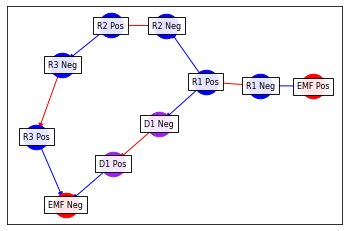

In [31]:
for color, colored_nodes in color_dict.items():
    poses = {
        node: loc
        for node, loc in node_pos.items() if node in colored_nodes
    }
    nx.draw_networkx_nodes(circuit_graph, poses, nodelist=list(poses.keys()), node_size=600, node_color=color)
    
nx.draw_networkx_edges(circuit_graph, node_pos, edgelist=connect_edge_list, edge_color="blue")
nx.draw_networkx_edges(circuit_graph, node_pos, edgelist=internal_edge_list, edge_color="red")

labels = {
    node_name: node_name for node_name in node_pos
}
label_options = {"ec": "k", "fc": "white", "alpha": 0.9}
nx.draw_networkx_labels(circuit_graph, node_pos, labels, font_size=8, font_color="Black", bbox=label_options)